In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import seaborn as sb #extra, just to visualize the multi-class confusion matrix

## Handwritten Digit Recognition
### Modified National Institute of Standards and Technology (MNIST) Dataset
#### Download the data from [Kaggle](https://www.kaggle.com/oddrationale/mnist-in-csv)
There is a training set and a test set available in this dataset. Every row corresponds to a handwritten digit. The first column is named `label`, which is the true digit that was written ($0-9$).

For more information on this dataset, please see the [official page](http://yann.lecun.com/exdb/mnist/), which includes:
- "The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image."

Moreover, there are $28 \times 28$ predictors in the dataset. To understsand their meaning, we refer to the same page again:
- "The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field."

**Q1: Load the training and test sets as Pandas dataframes.**

In [2]:
train = pd.read_csv('mnist_train.csv.zip')
test = pd.read_csv('mnist_test.csv.zip')

In [4]:
print("Training set shape:", train.shape, "test set shape:", test.shape)

Training set shape: (60000, 785) test set shape: (10000, 785)


**Q2: Plot (with a histogram) the distribution of the digits in the training set. Report if there are missing values (if yes, drop such rows).**

<AxesSubplot:ylabel='Frequency'>

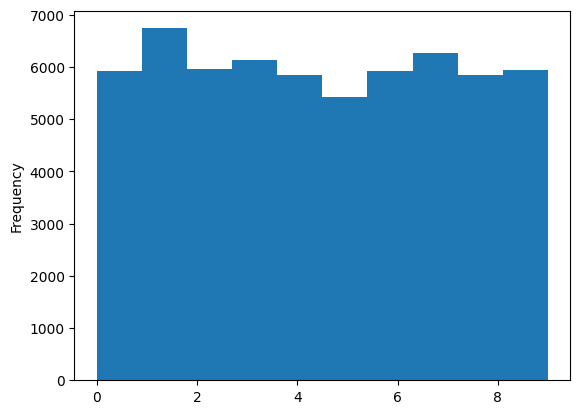

In [6]:
train.label.plot.hist()

In [10]:
sum(train.isna().sum())

0

**Q3: Visualize whichever row you like below.**

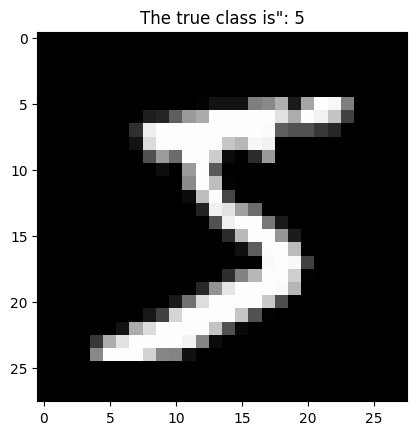

In [12]:
#this answer is provided, nothing to code
instance = 0 #change this freely to see different visualizations
plt.imshow(np.reshape(np.array(train.iloc[instance,1:]), (-1,28)), cmap = 'gray');
plt.title('The true class is": %i' %train.iloc[instance, 0])
plt.show()

**Q4: Train a linear Kernel SVM based classifier (linear SVC) on the training set after standardizing the data appropriately.**

In [13]:
#First standardize
train_X = train.drop('label',axis=1) #predictors of the training set
train_y = train['label'] #targets (true digits) of the training set
test_X = test.drop('label',axis=1) #predictors of the test set
test_y = test['label'] #targets (true digits) of the test set

#only standardize the predictors. Keep the code below.
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(train_X)
train_X = scaling.transform(train_X)
test_X = scaling.transform(test_X)

In [19]:
lin_clf = svm.SVC(kernel='linear') #runs the one-versus-rest approach in multi-class classification by default
#see https://scikit-learn.org/stable/modules/svm.html#multi-class-classification for more details

#fit the lin_clf to the training set

In [21]:
lin_clf.fit(train_X,train_y)

SVC(kernel='linear')

**Q5: Plot the confusion matrix obtained in the training set and report the accuracy.**

In [22]:
pred = lin_clf.predict(train_X) #predict the training set

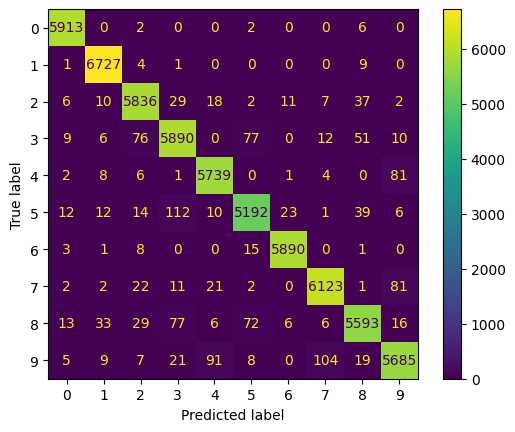

In [25]:
cm = confusion_matrix(train_y,pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lin_clf.classes_)
disp.plot()

In [26]:
accuracy_score(train_y,pred) #use the "sklearn.metric.accuracy_score" to return this (other options are also fine)

0.9764666666666667

**Q6: Plot the confusion matrix obtained in the test set and report the accuracy.**

In [27]:
pred = lin_clf.predict(test_X)#predict the test set

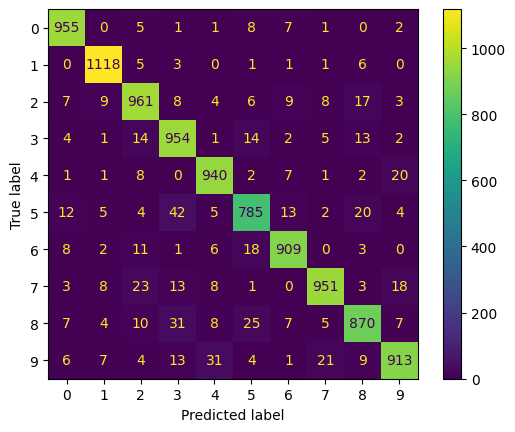

In [28]:
cm = confusion_matrix(test_y,pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lin_clf.classes_)
disp.plot()

In [29]:
accuracy_score(test_y,pred) #use the "sklearn.metric.accuracy_score" to return this (other options are also fine)

0.9356

In [31]:
result = pd.DataFrame({'True':test_y,'Pred':pred})
result

,True,Pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


In [34]:
result_correct = result[result.apply(lambda x: x['True']==x['Pred'],axis=1)]

In [35]:
result_correct

,True,Pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


In [36]:
result_incorrect = result[result.apply(lambda x: x['True']!=x['Pred'],axis=1)]

In [37]:
result_incorrect

,True,Pred
8,5,6
66,6,2
121,4,2
124,7,4
149,2,9
...,...,...
9926,8,5
9940,6,0
9970,5,3
9982,5,3


**Q7: Visualize one test digit which we correctly classified, and another one we misclassified**

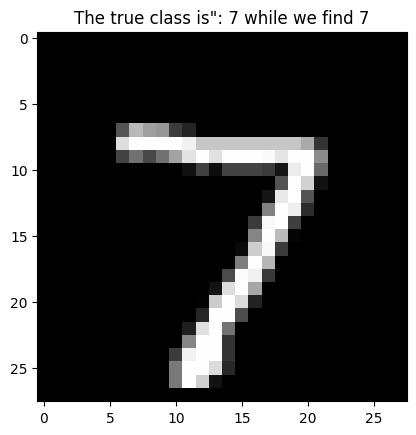

In [32]:
instance = 0 #correct classification
plt.imshow(np.reshape(np.array(test.iloc[instance,1:]), (-1,28)), cmap = 'gray');
plt.title('The true class is": %i while we find %i' % (test_y[instance], pred[instance]))
plt.show()

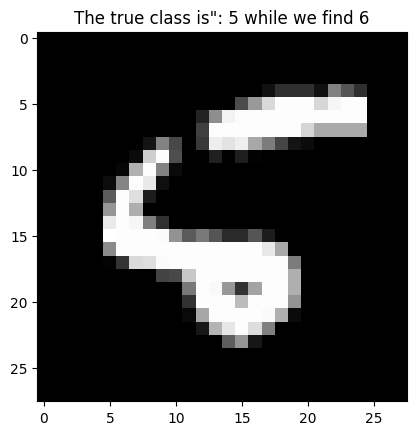

In [38]:
instance = 8 #wrong classification -- well it makes "sense" as it really looks like 7 :)
plt.imshow(np.reshape(np.array(test.iloc[instance,1:]), (-1,28)), cmap = 'gray');
plt.title('The true class is": %i while we find %i' % (test_y[instance], pred[instance]))
plt.show()

**Q8: Find a test digit that is originally 4, but we predicted as 3. Plot this digit. Interpret the result.**

In [46]:
#very simple and non-efficient way of finding the index that satisfies this
for i in range(len(test_y)):
    if test_y[i]==4 and pred[i]==3:
        print(i)
        break

In [49]:
result[result.apply(lambda x: x['True']==4 and x['Pred']==3,axis=1)]

,True,Pred


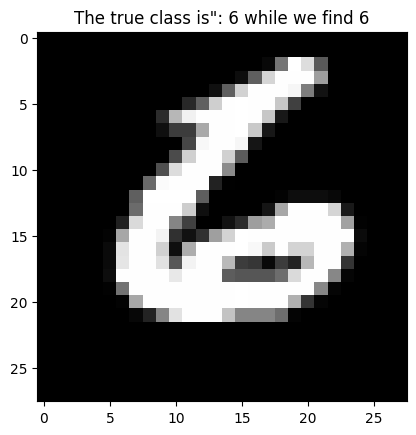

In [50]:
instance = i #wrong classification -- well it makes "sense" as it really looks like 7 :)
plt.imshow(np.reshape(np.array(test.iloc[instance,1:]), (-1,28)), cmap = 'gray');
plt.title('The true class is": %i while we find %i' % (test_y[instance], pred[instance]))
plt.show()
#Answer: we can see that there are two disconnected shapes

**Q9: Try the radial Kernel in your SVM classification. Keep the other parameters default.**

In [51]:
clf = svm.SVC(kernel='rbf') #runs the one-versus-one approach in multi-class classification
clf.fit(train_X,train_y) # fit clf to the training set (i.e., training stage)

SVC()

**Q10: Visualize the test-set confusion matrix and report the test accuracy of this model.**

In [52]:
pred = clf.predict(test_X) #use "predict" function of scikit's svm library

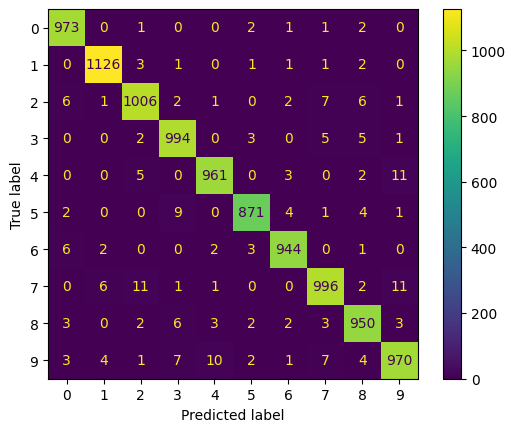

In [53]:
cm = confusion_matrix(test_y,pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

In [54]:
accuracy_score(test_y,pred)

0.9791

**Q11: Discuss whether the linear or radial Kernel gives better results.**

- Answer: ...

**(Optional question): By using cross-validation, compare SVCs with different Kernels, parameters, as well as one-versus-one approach. Report the test error of the model picked.**

Note that, if you implemented correctly, you will already have close to 98% test set accuracy via simplest forms of SVMs. Hence, it will be an interesting task for you to tune additional parameters via cross-validation, and to see if the test performance can be improved even further.